<a href="https://colab.research.google.com/github/IM07813/tfbasics/blob/main/classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## classification problem
1. **Input layer shape** (same as no. of features) 
2. **hidden layers** (min = 1, max = unlimited)
3. **neurons per hiddenlayer** (10-100 in general)
4. **Output layer shape** (depends on classes)
    1. binary classification
    2. multi-class classification
    3. multi-label classification
5. **Hidden activation function** (Relu etc)
6. **Output activation** (sigmoid usually) 
7. **Loss function** (cross-entropy etc)
8. **Optimizer**  (SGD etc)

Most common input layer has 4 parameter or is 4 dimentional 
1. **Example** [batch_size, width, height, color_channels]

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000 

X, Y = make_circles(n_samples, noise=0.03, random_state=42)


In [2]:
X #checking features

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
Y #checking labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
#visualizing our data
import pandas as pd 
circles = pd.DataFrame({"X0" :X[:,0], "X1" :X[:,1], "label":Y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


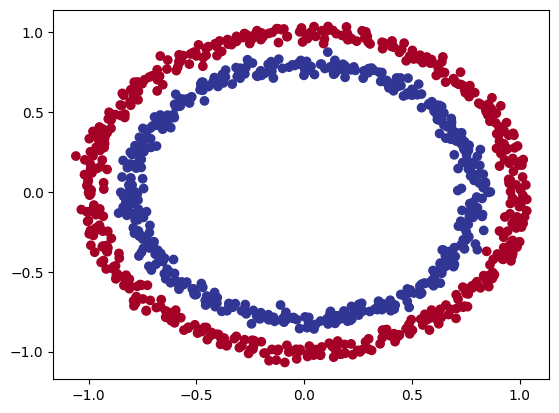

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=Y, cmap = plt.cm.RdYlBu)

###We will create a model to classify inputs to where they belong, either red or blue.
1. It's a binary classification problem 


In [6]:
X.shape, Y.shape

((1000, 2), (1000,))

In [7]:
len(X), len(Y)

(1000, 1000)

In [8]:
import tensorflow as tf

In [9]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

model_1.fit(X, Y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 5.4280 - accuracy: 0.5140
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.8049 - accuracy: 0.5570
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 4.5345 - accuracy: 0.5230
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 4.3413 - accuracy: 0.5260
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 4.1633 - accuracy: 0.5230


In [10]:
model_1.evaluate(X, Y)

32/32 [==============================] - 0s 3ms/step - loss: 4.1677 - accuracy: 0.5230


[4.167662620544434, 0.5230000019073486]

In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

model_2.fit(X, Y, epochs = 20, verbose = 2)

Epoch 1/20
32/32 - 2s - loss: 0.9064 - accuracy: 0.4810 - 2s/epoch - 50ms/step
Epoch 2/20
32/32 - 0s - loss: 0.7076 - accuracy: 0.4900 - 152ms/epoch - 5ms/step
Epoch 3/20
32/32 - 0s - loss: 0.7033 - accuracy: 0.4820 - 181ms/epoch - 6ms/step
Epoch 4/20
32/32 - 0s - loss: 0.7007 - accuracy: 0.4960 - 90ms/epoch - 3ms/step
Epoch 5/20
32/32 - 0s - loss: 0.6994 - accuracy: 0.4950 - 175ms/epoch - 5ms/step
Epoch 6/20
32/32 - 0s - loss: 0.6979 - accuracy: 0.4870 - 163ms/epoch - 5ms/step
Epoch 7/20
32/32 - 0s - loss: 0.6978 - accuracy: 0.5060 - 101ms/epoch - 3ms/step
Epoch 8/20
32/32 - 0s - loss: 0.6972 - accuracy: 0.4980 - 85ms/epoch - 3ms/step
Epoch 9/20
32/32 - 0s - loss: 0.6966 - accuracy: 0.4890 - 64ms/epoch - 2ms/step
Epoch 10/20
32/32 - 0s - loss: 0.6959 - accuracy: 0.4970 - 79ms/epoch - 2ms/step
Epoch 11/20
32/32 - 0s - loss: 0.6961 - accuracy: 0.4920 - 103ms/epoch - 3ms/step
Epoch 12/20
32/32 - 0s - loss: 0.6960 - accuracy: 0.4910 - 104ms/epoch - 3ms/step
Epoch 13/20
32/32 - 0s - loss: 

In [12]:
model_2.evaluate(X,Y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4860


[0.6939961314201355, 0.4860000014305115]

In [13]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_3.fit(X, Y, epochs = 20)

Epoch 1/20
32/32 [==============================] - 2s 4ms/step - loss: 2.5077 - accuracy: 0.4650
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.7111 - accuracy: 0.4600
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6999 - accuracy: 0.4840
Epoch 4/20
32/32 [==============================] - 0s 6ms/step - loss: 0.6954 - accuracy: 0.4860
Epoch 5/20
32/32 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.4730
Epoch 6/20
32/32 [==============================] - 0s 7ms/step - loss: 0.6940 - accuracy: 0.4690
Epoch 7/20
32/32 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.5100
Epoch 8/20
32/32 [==============================] - 0s 9ms/step - loss: 0.6947 - accuracy: 0.4960
Epoch 9/20
32/32 [==============================] - 0s 7ms/step - loss: 0.6942 - accuracy: 0.4950
Epoch 10/20
32/32 [==============================] - 0s 8ms/step - loss: 0.6943 - accuracy: 0.4460
Epoch 11/20
32/32 [

In [14]:
model_3.evaluate(X,Y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.4970


[0.6932669281959534, 0.4970000088214874]

#let's visualize decision boundary 
1. take in a trained model.
2. create a meshgrid of the different X values 
3. Make predictions across the meshgrid 
4. Plot the predictions as well as a line between zones 


In [15]:
import numpy as np

def plot_decision_boundary(model, X, Y):
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(),yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis =1). reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy, y_pred, cmap = plt.cm.RdYlBu,  alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c=Y, s=40,cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  

313/313 [==============================] - 2s 3ms/step
doing binary classification


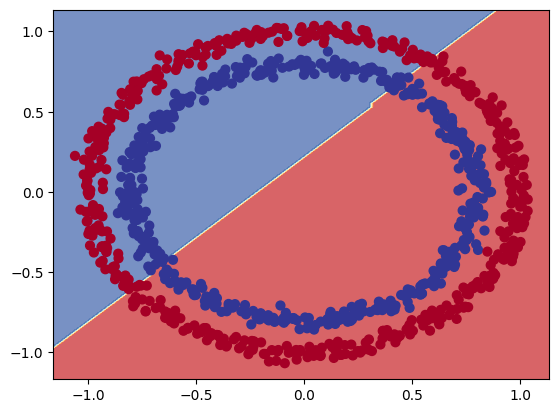

In [16]:
plot_decision_boundary(model = model_3,
                       X = X,
                       Y = Y)

## as we can see the model here is doing poorly and trying to make a best fit line to predict where each new particle will go and it's not working

##As we can see, our model is non-linear so we need something to make our model act as non-linear function, this is where **activation function** comes in and helps us with non-linearity 
##common activation functions are **Relu**, **softmax**, **tanh** etc 

In [18]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = tf.keras.activations.linear),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])

model_4.fit(X, Y, epochs = 20)

Epoch 1/20
32/32 [==============================] - 1s 3ms/step - loss: 2.6427 - accuracy: 0.4520
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.7157 - accuracy: 0.4950
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6959 - accuracy: 0.4870
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.4930
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.4740
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.4410
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5120
Epoch 8/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.5010
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.4730
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4520
Epoch 11/20
32/32 [

In [19]:
#check the decision boundary for this model 4 


313/313 [==============================] - 1s 2ms/step
doing binary classification


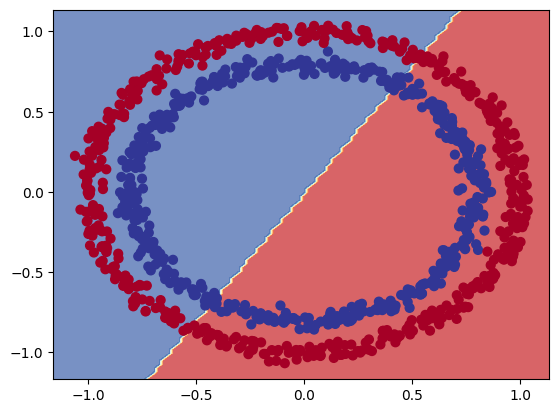

In [20]:
plot_decision_boundary(model = model_4,
                       X = X,
                       Y = Y)

In [21]:
#creating a model with relu 
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])

model_5.fit(X, Y, epochs = 20)

Epoch 1/20
32/32 [==============================] - 3s 4ms/step - loss: 1.7566 - accuracy: 0.4580
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.7765 - accuracy: 0.3260
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.7388 - accuracy: 0.3360
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.7272 - accuracy: 0.2920
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.4050
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5060
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6180
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.6580
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.7360
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.8600
Epoch 11/20
32/32 [

313/313 [==============================] - 1s 3ms/step
doing binary classification


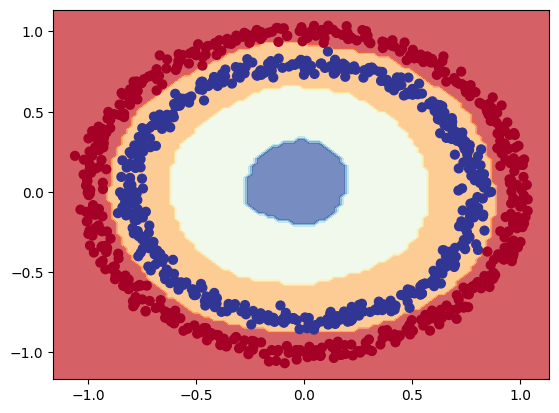

In [22]:
plot_decision_boundary(model = model_5,
                       X = X,
                       Y = Y)

In [24]:
#creating a model with relu 
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])

history= model_6.fit(X, Y, epochs = 20)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.4850
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4980
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5080
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5000
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5000
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5120
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.5460
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.6460
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.5410
Epoch 11/20
32/32 [

313/313 [==============================] - 1s 3ms/step
doing binary classification


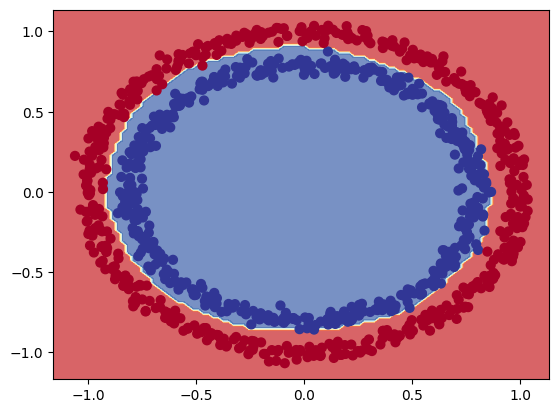

In [25]:
plot_decision_boundary(model = model_6,
                       X = X,
                       Y = Y)

In [26]:
model_6.evaluate(X,Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.9960


[0.40876561403274536, 0.9959999918937683]